In [15]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('spam_ham_dataset.csv')

In [5]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [6]:
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
print(df['text'][0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


In [13]:
print(df['label'][0])

ham


In [14]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [20]:
df['text'] = df['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label'] 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [23]:
clf.fit(X_train, y_train)

MultinomialNB()

In [24]:
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9227053140096618


In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

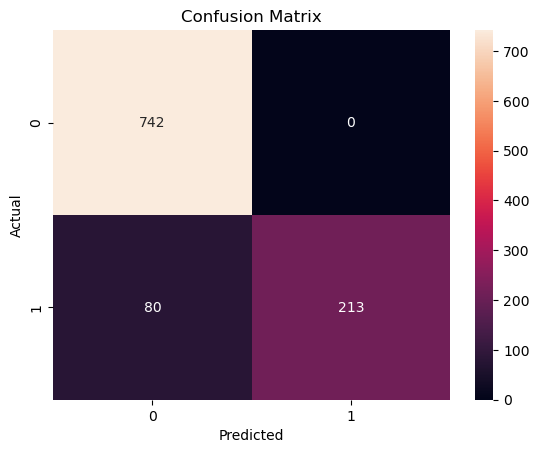

In [29]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
svm_model=SVC()

In [31]:
svm_model.fit(X_train, y_train)

SVC()

In [32]:
svm_pred=svm_model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9855072463768116


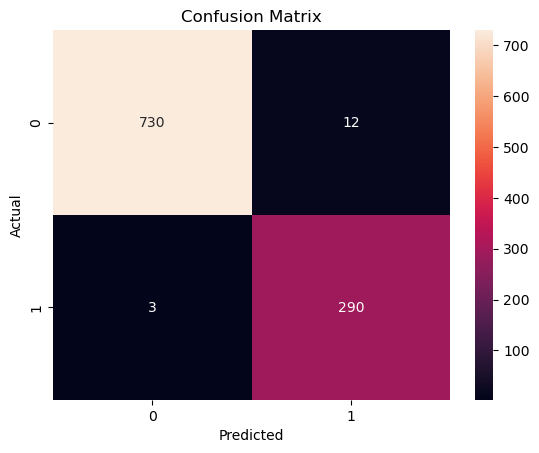

In [34]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 0.988394114107799
Accuracy: 0.9893719806763285


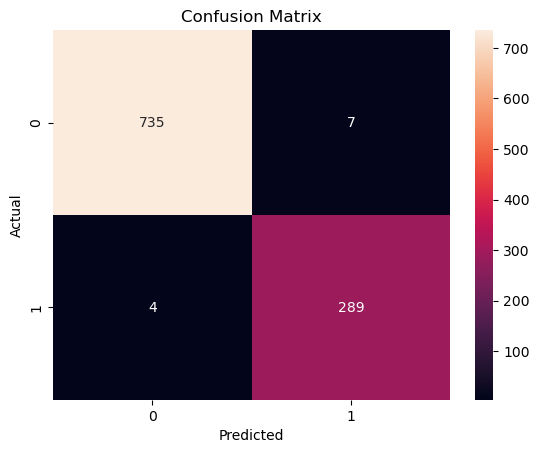

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
new_df = pd.read_csv('mail_data.csv')

In [42]:
new_df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
new_df = new_df.rename(columns={'Category': 'label'})

In [45]:
new_df = new_df.rename(columns={'Message': 'text'})
new_df.columns

Index(['label', 'text'], dtype='object')

In [47]:
new_df['text'] = new_df['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer()
new_X = vectorizer.fit_transform(new_df['text'])
new_y = new_df['label'] 

In [48]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [49]:
best_model.fit(new_X_train, new_y_train)

SVC(C=10, gamma=0.1, kernel='linear')

In [50]:
new_y_pred = best_model.predict(new_X_test)

In [51]:
new_accuracy = accuracy_score(new_y_test, new_y_pred)
print("Accuracy:", new_accuracy)

Accuracy: 0.9820627802690582


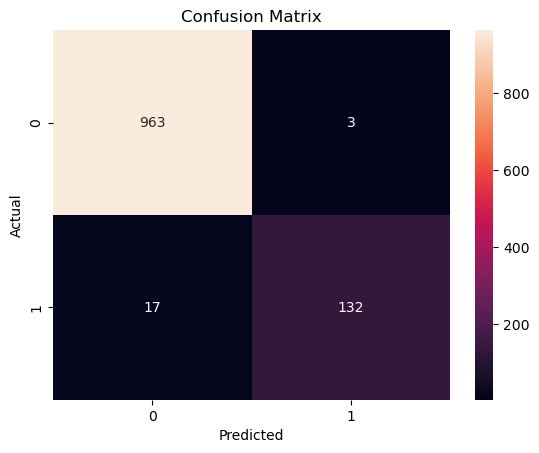

In [52]:
sns.heatmap(confusion_matrix(new_y_test, new_y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()